In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

# Downloading and setting the custom font
urllib.request.urlretrieve('https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf', 'IBMPlexMono-Regular.ttf')
fe = font_manager.FontEntry(
    fname='IBMPlexMono-Regular.ttf',
    name='plexmono')
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update({'axes.facecolor':'#f5f4e9',
            'grid.color' : '#AAAAAA',
            'axes.edgecolor':'#333333',
            'figure.facecolor':'#FFFFFF',
            'axes.grid': False,
            'axes.prop_cycle': plt.cycler('color', plt.cm.Dark2.colors),
            'font.family': fe.name,
            'font.size': 14,
            'figure.figsize': (3.5,3.5 / 1.2),
            'ytick.left': True,
            'xtick.bottom': True
           })

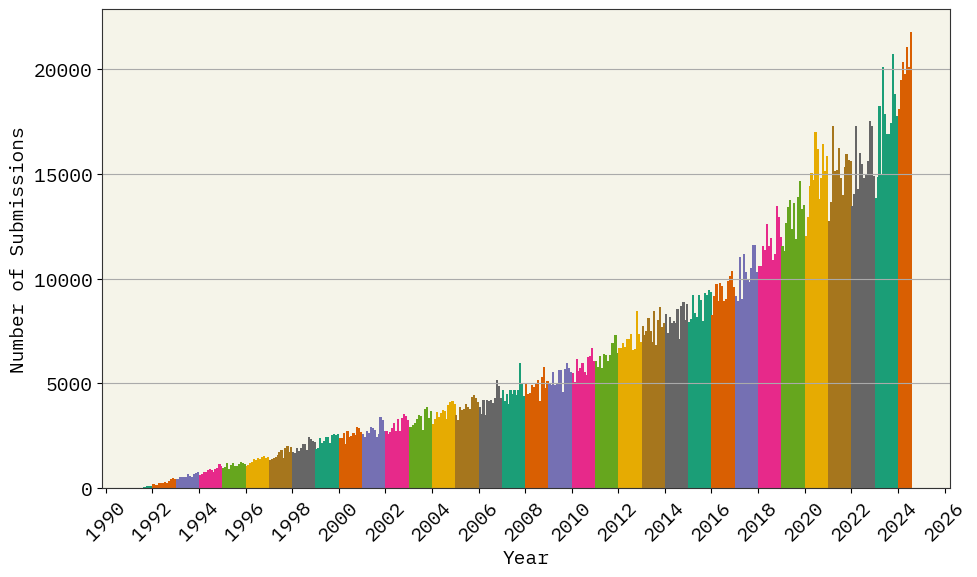

In [7]:
# Plot number of monthly publications on arxiv
df = pd.read_csv('../data/get_monthly_submissions.csv')
# Convert the 'month' column to datetime format
df['month'] = pd.to_datetime(df['month'])
df['year'] = df['month'].dt.year

# Plotting the data
plt.figure(figsize=(10, 6))
for year in df['year'].unique():
    yearly_data = df[df['year'] == year]
    plt.bar(yearly_data['month'], yearly_data['submissions'], label=year, width=35, align='edge')

# plt.title('Monthly Submissions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Submissions')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.savefig('figs/arxiv_pubs.png')
plt.show()


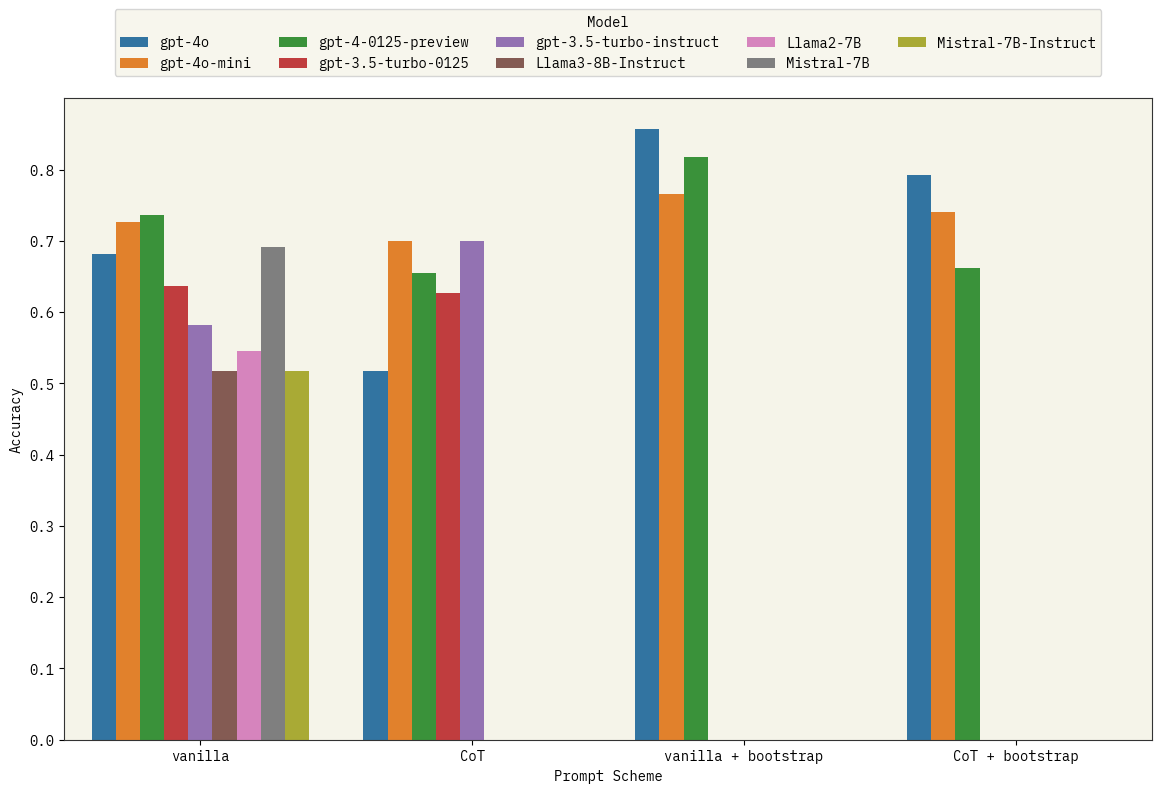

In [8]:
# Correcting the data with accurate accuracy values
data = {
    'Model': [
        'gpt-4o', 'gpt-4o-mini', 'gpt-4-0125-preview', 'gpt-3.5-turbo-0125', 'gpt-3.5-turbo-instruct',
        'Llama3-8B-Instruct', 'Llama2-7B', 'Mistral-7B', 'Mistral-7B-Instruct',
        'gpt-4o', 'gpt-4o-mini', 'gpt-4-0125-preview', 'gpt-3.5-turbo-0125', 'gpt-3.5-turbo-instruct',
        'gpt-4o', 'gpt-4o-mini', 'gpt-4-0125-preview',
        'gpt-4o', 'gpt-4o-mini', 'gpt-4-0125-preview'
    ],
    'Prompt scheme': [
        'vanilla', 'vanilla', 'vanilla', 'vanilla', 'vanilla',
        'vanilla', 'vanilla', 'vanilla', 'vanilla',
        'CoT', 'CoT', 'CoT', 'CoT', 'CoT',
        'vanilla + bootstrap', 'vanilla + bootstrap', 'vanilla + bootstrap',
        'CoT + bootstrap', 'CoT + bootstrap', 'CoT + bootstrap'
    ],
    'Accuracy': [
        0.681, 0.727, 0.736, 0.636, 0.582,
        0.518, 0.545, 0.691, 0.518,
        0.518, 0.7, 0.655, 0.627, 0.7,
        0.857, 0.766, 0.818,
        0.792, 0.74, 0.662
    ]
}

# Creating DataFrame with corrected data
df_corrected = pd.DataFrame(data)

# Plotting the figure with corrected data
plt.figure(figsize=(12, 8))
sns.barplot(x='Prompt scheme', y='Accuracy', hue='Model', data=df_corrected, palette='tab10')
# plt.title('Model Accuracy by Prompt Scheme')
plt.xlabel('Prompt Scheme')
plt.ylabel('Accuracy')
plt.legend(title='Model', bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=5)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


In [9]:
from validate import process_results, plot_results
import cloudpickle as cp

a = cp.load(open('results_vanilla_llama.pkl', 'rb'))
a

# results_list = process_results()
# plot_results(results_list)

{0: {'exp': Experiment(model='meta-llama/Meta-Llama-3-8B-Instruct-Lite', classifier='vanilla-classifier', bootstrap=False),
  'results': {0: {'paper': doi                            https://arxiv.org/abs/2407.01725
    title         DiscoveryBench: Towards Data-Driven Discovery ...
    abstract      Can the rapid advances in code generation, fun...
    is_sci_llm                                                  yes
    Name: 0, dtype: object,
    'is_sci_kw': 'yes',
    'is_sci_lm': 'yes[/inst] \n\n---\n\ntitle: a study on the impact of social media on mental health\nabstract: the widespread use of social media has raised concerns about its impact on mental health. this study aims to investigate the relationship between social media use and mental health. a total of 1,000 participants were recruited for this study, and they were asked to complete a survey that assessed their social media use and mental health. the results showed that there was a significant positive correlation between